In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm as normal, binom
import bplot as bp
from scipy.optimize import minimize
from scipy.special import loggamma

# October 23, 2019

## Statistical Modelling
We have $X_1,\dots,X_N\sim N(\mu, \sigma^2)$. We're going to act as if all we're interested in is the population mean.

$$L(\mu|\underline{x})=\prod_{n=1}^{N}f(x_n|\mu)$$
$$log(L(\mu|\underline{x})=\sum_{n=1}^{N}\log((2\pi \sigma^2)^{\frac{-1}{2}}+e^{-\frac{(x_n-\mu)^2}{2\sigma^2}}$$
and because we're not concerned about $\sigma$,
$$\propto_\mu\sum_{n=1}^{N}-\frac{(x_n-\mu)^2}{2\sigma^2}$$
And because we're considering $\sigma$ to be a sigma, we can say the simplified log likelihood is just
$$-\sum_{n=1}^{N}(x_n-\mu)^2$$
And we will be using this model, solely changing $\mu$ (for the sake of this course). Currently, we're using $\mu$ to be a constant. Stating "If we had to choose a $x_{n+1}$, choose the mean"

In [2]:
def ll_normal(mu, X):
    d = X - mu
    return np.sum(d*d)

Explanation of Books

https://github.com/roualdes/data/blob/master/books.txt

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/roualdes/data/master/books.csv")

In [5]:
df.head(8) ### Prints the first n observations within the data set

,isbn,uclaNew,amazNew
0,978-0803272620,27.67,27.95
1,978-0030119194,40.59,31.14
2,978-0300080643,31.68,32.00
3,978-0226206813,16.00,11.52
4,978-0892365999,18.95,14.21
5,978-0394723693,14.95,10.17
6,978-0822338437,24.70,20.06
7,978-0816646135,19.50,16.66


In [9]:
dir(df) ## Makes a list of all the members and methods of a class
help(pd.read_csv) ## Pulls up help files on functions

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer: Union[str, pathlib.Path, IO[~AnyStr]], sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read a comma-separated values (csv) file into Dat

In [15]:
df['uclaNew'] + 2

0     29.67
1     42.59
2     33.68
3     18.00
4     20.95
      ...  
68    50.46
69    41.55
70    31.65
71    25.76
72    29.70
Name: uclaNew, Length: 73, dtype: float64

In [21]:
df.shape ## Gives a tuple stating how many rows and columns in a dataframe
N = df.shape[0]
R = 1001
mus = np.full(R, np.nan)
for r in range(R):
    idx = np.random.choice(N, N, replace = True)
    mus[r] = minimize(ll_normal, (50), args=(df['uclaNew'][idx]), method="BFGS")["x"]

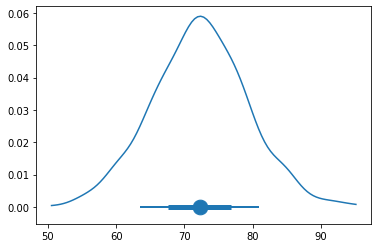

In [26]:
bp.density(mus)
bp.percentile_h(mus, y=0)

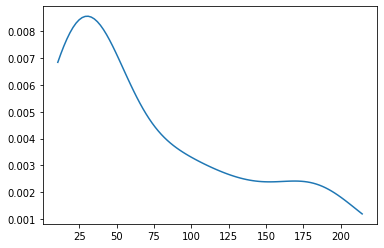

In [28]:
bp.density(df['uclaNew']) # Tells us about individual book prices

In [33]:
def min(data, initval = None):
    return minimize(ll_normal, (initval if initval else np.random.normal()), args=(data), method="BFGS")["x"]

def bootstrap(data, R, fun, confidence=95):
    N = data.size
    thetas = np.full(R, np.nan)
    for r in range(R):
        idx = np.random.choice(N, N, replace=True)
        thetas[r] = fun(data[idx])
    return np.percentile(thetas, [(100-confidence)/2, (100-confidence)/2 + confidence])

R=1001
bootstrap(df['amazNew'],R,min)

array([48.32863255, 70.3172682 ])